In [1]:
import pandas as pd

In [2]:
BID = pd.read_csv('./dataset/BID1.csv')
BID.head(5)

,Symbol,Value,TradingDate,Time,Open,High,Low,Close,Volume
0,BID,1.590710e+11,24/1/2014,NaN,19000,19500,18500,18800,8417060
1,BID,5.950934e+10,27/1/2014,NaN,18700,18800,18100,18400,3240910
2,BID,1.713530e+10,6/2/2014,NaN,18200,18300,17600,17600,959590
3,BID,5.025221e+10,7/2/2014,NaN,17400,17500,16500,16600,2987600
4,BID,6.791783e+10,10/2/2014,NaN,16500,17200,16200,17000,4052090


In [3]:
inputCols = ["Open", "High", "Low"]
X = BID[inputCols]
X.head()


,Open,High,Low
0,19000,19500,18500
1,18700,18800,18100
2,18200,18300,17600
3,17400,17500,16500
4,16500,17200,16200


In [4]:
y = BID["Close"]
y.head()

0    18800
1    18400
2    17600
3    16600
4    17000
Name: Close, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 2432
Labels counts in y_train: 1702
Labels counts in y_test: 730


## Model selection cho k_NN dùng phương pháp holdout

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Text(0, 0.5, 'MSE')

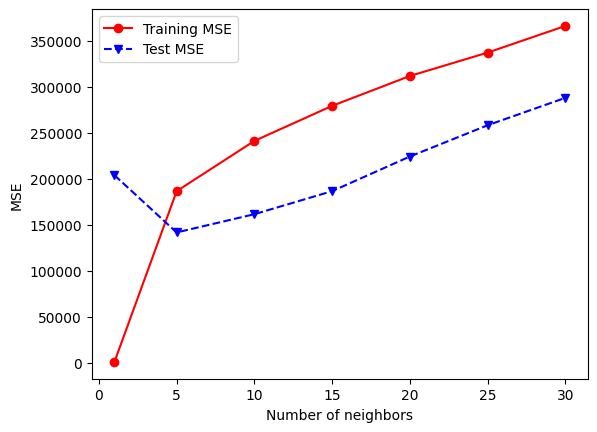

In [8]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainMSE = []
testMSE = []

for k in numNeighbors:
    reg = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    reg.fit(X_train, y_train)
    y_predTrain = reg.predict(X_train)
    y_predTest = reg.predict(X_test)
    trainMSE.append(mean_squared_error(y_train, y_predTrain))
    testMSE.append(mean_squared_error(y_test, y_predTest))

plt.plot(numNeighbors, trainMSE, 'ro-', numNeighbors, testMSE,'bv--')
plt.legend(['Training MSE','Test MSE'])
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

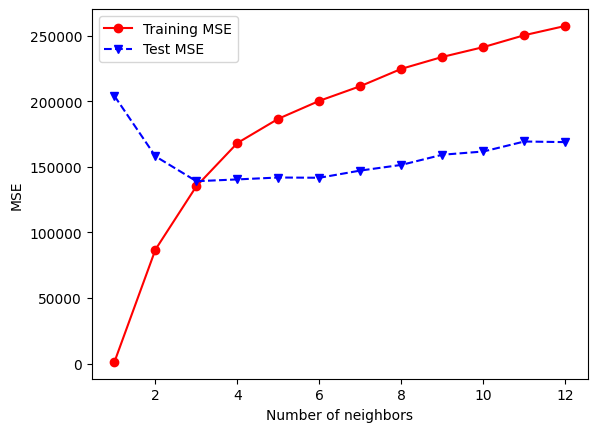

In [9]:
numNeighbors = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
trainMSE = []
testMSE = []

for k in numNeighbors:
    reg = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    reg.fit(X_train, y_train)
    y_predTrain = reg.predict(X_train)
    y_predTest = reg.predict(X_test)
    trainMSE.append(mean_squared_error(y_train, y_predTrain))
    testMSE.append(mean_squared_error(y_test, y_predTest))

plt.plot(numNeighbors, trainMSE, 'ro-', numNeighbors, testMSE,'bv--')
plt.legend(['Training MSE','Test MSE'])
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')

**Nhận xét**

- Khi $k = 1$ mô hình cho kết quả (MSE) trên tập train rất tốt nhưng kết quả trên tập test tương đối cao so với tập train. Mô hình có dấu hiệu overfitting.

- Khi tăng $k$ lên (1, 3 ) kết quả trên tập train tăng lên nhưng kết quả trên tập test có xu hướng giữ nguyên. Nên khoảng này được đánh giá cho kết quả tốt.  

- Khi tăng $k$ lên nữa (3, 12) kết quả trên tập train và test có khuynh hướng cùng tăng cao. Mô hình có thể bị underfitting

In [10]:
reg = KNeighborsRegressor(n_neighbors=3, metric='minkowski', p=2)
reg.fit(X_train, y_train)
y_predTrain = reg.predict(X_train)
y_predTest = reg.predict(X_test)
MSE_train = mean_squared_error(y_train, y_predTrain)
MSE_test = mean_squared_error (y_test, y_predTest)
print("MSE train = ", MSE_train)
print("MSE test = ", MSE_test)

r2 = r2_score(y_train, y_predTrain)
print(f'The train R-squred score is {r2}')

r2 = r2_score(y_test, y_predTest)
print(f'The test R-squred score is {r2}')

MSE train =  135259.8250424337
MSE test =  139028.5388127854
The train R-squred score is 0.9989399016594726
The test R-squred score is 0.9988984812197498


## Model selection cho k_NN dùng phương pháp cross validation

In [11]:
from sklearn.model_selection import KFold
import numpy as np

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [13]:


numNeighbors = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

kf = KFold(n_splits = 10, shuffle=True) 
trainMSE = []
valMSE = []
testMSE = []
for neighbor in numNeighbors:

    train_fold_MSE = []
    val_fold_MSE = []
    test_MSE = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index] 
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        reg = KNeighborsRegressor(n_neighbors = neighbor, metric='minkowski', p=2, algorithm='kd_tree')

        reg.fit(X_train_fold, y_train_fold)

        y_train_fold_pred = reg.predict(X_train_fold)
        y_val_fold_pre = reg.predict(X_val_fold)
        y_test_pred = reg.predict(X_test)

        MSE_train_fold = mean_squared_error(y_train_fold_pred, y_train_fold)
        MSE_val_fold = mean_squared_error(y_val_fold_pre, y_val_fold)
        MSE_test = mean_squared_error(y_test_pred,y_test)

        train_fold_MSE.append(MSE_train_fold)
        val_fold_MSE.append(MSE_val_fold)
        test_MSE.append(MSE_test)

    trainMSE.append(np.mean(train_fold_MSE))
    valMSE.append(np.mean(MSE_val_fold))
    testMSE.append(np.mean(MSE_test))
    # In ra train, validation, và test MSE theo alpha
    print('neighbor: {:6} | MSE_train_fold: {:6} | MSE_val_fold: {:6} | MSE_test: {:6}'.
            format(neighbor, round(np.mean(train_fold_MSE), 2), round(np.mean(MSE_val_fold), 2), round(np.mean(MSE_test), 2)))

neighbor:      1 | MSE_train_fold: 1685.55 | MSE_val_fold: 221224.23 | MSE_test: 207813.14
neighbor:      2 | MSE_train_fold: 81613.58 | MSE_val_fold: 128424.61 | MSE_test: 166876.28
neighbor:      3 | MSE_train_fold: 127223.16 | MSE_val_fold: 126239.98 | MSE_test: 155132.33
neighbor:      4 | MSE_train_fold: 155516.29 | MSE_val_fold: 1418120.97 | MSE_test: 139058.65
neighbor:      5 | MSE_train_fold: 173941.32 | MSE_val_fold: 146645.88 | MSE_test: 140056.67
neighbor:      6 | MSE_train_fold: 188814.74 | MSE_val_fold: 115233.03 | MSE_test: 155715.83
neighbor:      7 | MSE_train_fold: 199652.75 | MSE_val_fold: 125997.79 | MSE_test: 151642.61
neighbor:      8 | MSE_train_fold: 209645.04 | MSE_val_fold: 1376720.16 | MSE_test: 155818.31
neighbor:      9 | MSE_train_fold: 218855.66 | MSE_val_fold: 230016.7 | MSE_test: 179463.58
neighbor:     10 | MSE_train_fold: 225784.3 | MSE_val_fold: 125512.63 | MSE_test: 164320.64
neighbor:     11 | MSE_train_fold: 233248.78 | MSE_val_fold: 161268.0 | M

In [17]:
best_numNeighbor = 6

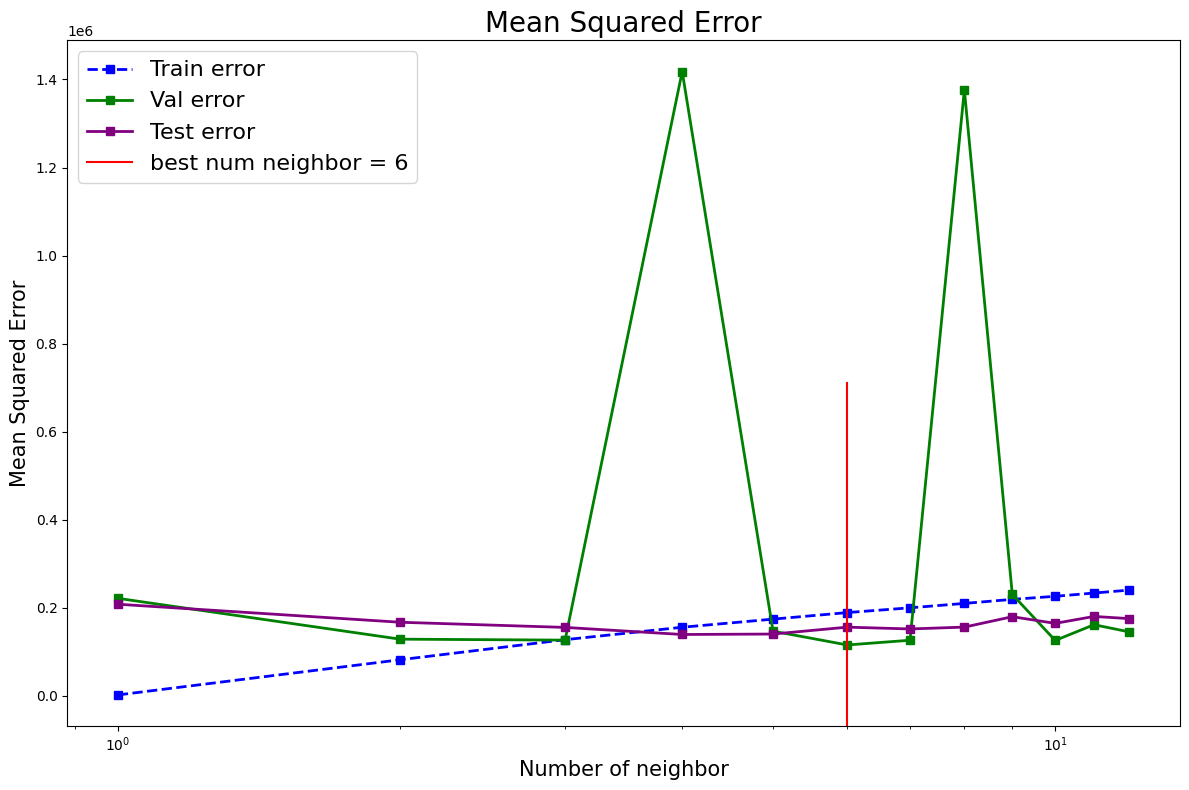

In [18]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(numNeighbors, trainMSE, 's--', label = 'Train error', color = 'blue', linewidth = 2)

ax.plot(numNeighbors, valMSE, 's-', label = 'Val error',color ='green', linewidth = 2)

ax.plot(numNeighbors, testMSE, 's-', label = 'Test error',color ='purple', linewidth = 2)

ax.axvline(best_numNeighbor, 0, 0.5, color = 'r', label = f'best num neighbor = {best_numNeighbor}')

ax.set_xlabel('Number of neighbor', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

In [19]:
reg = KNeighborsRegressor(n_neighbors = best_numNeighbor, metric='minkowski', p=2, algorithm='kd_tree')
reg.fit(X_train, y_train)
y_predTrain = reg.predict(X_train)
y_predTest = reg.predict(X_test)

train_MSE = mean_squared_error(y_train,y_predTrain)
test_MSE = mean_squared_error(y_test,y_predTest)

print("MSE train = ", train_MSE)
print("MSE test = ", test_MSE)

r2 = r2_score(y_train, y_predTrain)
print(f'The train R-squred score is {r2}')

r2 = r2_score(y_test, y_predTest)
print(f'The test R-squred score is {r2}')

MSE train =  186797.48643244785
MSE test =  142369.2391056354
The train R-squred score is 0.9985198057020612
The test R-squred score is 0.9989147001723703
